In [26]:
!pip install seaborn 

     |████████████████████████████████| 292 kB 57.9 MB/s            
     |████████████████████████████████| 28.4 MB 73.2 MB/s            
     |████████████████████████████████| 10.3 MB 91.6 MB/s            
     |████████████████████████████████| 3.1 MB 88.0 MB/s            
     |████████████████████████████████| 1.2 MB 86.3 MB/s            
You should consider upgrading via the '/opt/conda/bin/python -m pip install --upgrade pip' command.


# Analise Preparação de Dados 
 
## Dataset: CSGO Winner 

![](inbox_4895752_bf6d1be3b18ade8bd780840fd8f871c1_U78nzyG.jpg)

### Nome do arquivo: csgo_round_snapshots.xlsx
##### o Fonte: https://www.kaggle.com/christianlillelund/csgo-round-winner-classification

<p>o Contexto: este dataset contém o resultado de 122 mil momentos que aconteceram durante
mais de 700 partidas de campeonatos de alto nível do jogo Counter-Strike: Global Offensive.
Temos dados como, por exemplo, o arsenal de ambas as equipes (CT e T), o dinheiro
disponível para as duas equipes, o mapa, entre outros. A ideia é prever o vencedor da partida
(round_winner).</p>


In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [44]:
base = pd.read_csv("csgo_round_snapshots.csv")

In [79]:
import seaborn as sns 
sns.set_theme(style="white")


## Mapa de Calor - Valores Nan

<AxesSubplot:>

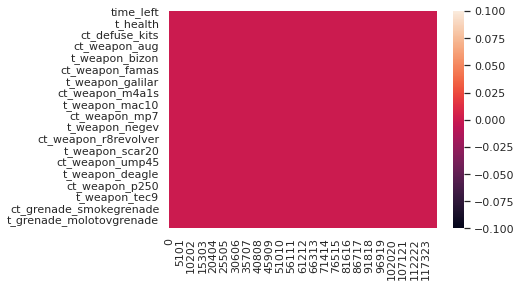

In [80]:
sns.heatmap(base.isnull().T)

## Total de Linhas na Base 

In [62]:
base['round_winner'].count()

122410

## Limpar e Normalizar os dados

In [66]:
base.groupby(['map']).count()

,time_left,ct_score,t_score,ct_health,t_health,ct_money,t_money,ct_helmets,t_helmets,ct_defuse_kits,...,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade,round_winner
map,,,,,,,,,,,,,,,,,,,,,
de_cache,145,145,145,145,145,145,145,145,145,145,...,145,145,145,145,145,145,145,145,145,145
de_dust2,22144,22144,22144,22144,22144,22144,22144,22144,22144,22144,...,22144,22144,22144,22144,22144,22144,22144,22144,22144,22144
de_inferno,23811,23811,23811,23811,23811,23811,23811,23811,23811,23811,...,23811,23811,23811,23811,23811,23811,23811,23811,23811,23811
de_mirage,18576,18576,18576,18576,18576,18576,18576,18576,18576,18576,...,18576,18576,18576,18576,18576,18576,18576,18576,18576,18576
de_nuke,19025,19025,19025,19025,19025,19025,19025,19025,19025,19025,...,19025,19025,19025,19025,19025,19025,19025,19025,19025,19025
de_overpass,14081,14081,14081,14081,14081,14081,14081,14081,14081,14081,...,14081,14081,14081,14081,14081,14081,14081,14081,14081,14081
de_train,13491,13491,13491,13491,13491,13491,13491,13491,13491,13491,...,13491,13491,13491,13491,13491,13491,13491,13491,13491,13491
de_vertigo,11137,11137,11137,11137,11137,11137,11137,11137,11137,11137,...,11137,11137,11137,11137,11137,11137,11137,11137,11137,11137


In [72]:
base['round_winner'].value_counts()

T     62406
CT    60004
Name: round_winner, dtype: int64

In [73]:
base.describe().transpose()


,count,mean,std,min,25%,50%,75%,max
time_left,122410.0,97.886922,54.465238,0.01,54.92,94.91,166.9175,175.0
ct_score,122410.0,6.709239,4.790362,0.00,3.00,6.00,10.0000,32.0
t_score,122410.0,6.780435,4.823543,0.00,3.00,6.00,10.0000,33.0
ct_health,122410.0,412.106568,132.293290,0.00,350.00,500.00,500.0000,500.0
t_health,122410.0,402.714500,139.919033,0.00,322.00,500.00,500.0000,600.0
...,...,...,...,...,...,...,...,...
t_grenade_incendiarygrenade,122410.0,0.019819,0.143933,0.00,0.00,0.00,0.0000,3.0
ct_grenade_molotovgrenade,122410.0,0.048011,0.227669,0.00,0.00,0.00,0.0000,3.0
t_grenade_molotovgrenade,122410.0,1.352095,1.663246,0.00,0.00,1.00,2.0000,5.0
ct_grenade_decoygrenade,122410.0,0.027694,0.169531,0.00,0.00,0.00,0.0000,3.0


In [81]:
base.dtypes


time_left                    float64
ct_score                       int64
t_score                        int64
map                           object
ct_health                      int64
                              ...   
ct_grenade_molotovgrenade      int64
t_grenade_molotovgrenade       int64
ct_grenade_decoygrenade        int64
t_grenade_decoygrenade         int64
round_winner                  object
Length: 94, dtype: object

In [92]:
pd.set_option('display.max_columns', None)

In [93]:
base.head()

,time_left,ct_score,t_score,map,ct_health,t_health,ct_money,t_money,ct_helmets,t_helmets,ct_defuse_kits,ct_players_alive,t_players_alive,ct_weapon_ak47,t_weapon_ak47,ct_weapon_aug,t_weapon_aug,ct_weapon_awp,t_weapon_awp,ct_weapon_bizon,t_weapon_bizon,ct_weapon_cz75auto,t_weapon_cz75auto,ct_weapon_elite,t_weapon_elite,ct_weapon_famas,t_weapon_famas,ct_weapon_g3sg1,t_weapon_g3sg1,ct_weapon_galilar,t_weapon_galilar,ct_weapon_glock,t_weapon_glock,ct_weapon_m249,t_weapon_m249,ct_weapon_m4a1s,t_weapon_m4a1s,ct_weapon_m4a4,t_weapon_m4a4,ct_weapon_mac10,t_weapon_mac10,ct_weapon_mag7,t_weapon_mag7,ct_weapon_mp5sd,t_weapon_mp5sd,ct_weapon_mp7,t_weapon_mp7,ct_weapon_mp9,t_weapon_mp9,ct_weapon_negev,t_weapon_negev,ct_weapon_nova,t_weapon_nova,ct_weapon_p90,t_weapon_p90,ct_weapon_r8revolver,t_weapon_r8revolver,ct_weapon_sawedoff,t_weapon_sawedoff,ct_weapon_scar20,t_weapon_scar20,ct_weapon_sg553,t_weapon_sg553,ct_weapon_ssg08,t_weapon_ssg08,ct_weapon_ump45,t_weapon_ump45,ct_weapon_xm1014,t_weapon_xm1014,ct_weapon_deagle,t_weapon_deagle,ct_weapon_fiveseven,t_weapon_fiveseven,ct_weapon_usps,t_weapon_usps,ct_weapon_p250,t_weapon_p250,ct_weapon_p2000,t_weapon_p2000,ct_weapon_tec9,t_weapon_tec9,ct_grenade_hegrenade,t_grenade_hegrenade,ct_grenade_flashbang,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade,round_winner
0,175.00,0,0,de_dust2,500,500,4000,4000,0,0,0,5,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,CT
1,156.03,0,0,de_dust2,500,500,600,650,0,0,1,5,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,1,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,CT
2,96.03,0,0,de_dust2,391,400,750,500,0,0,1,4,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,CT
3,76.03,0,0,de_dust2,391,400,750,500,0,0,1,4,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,CT
4,174.97,1,0,de_dust2,500,500,18350,10750,0,0,1,5,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,CT


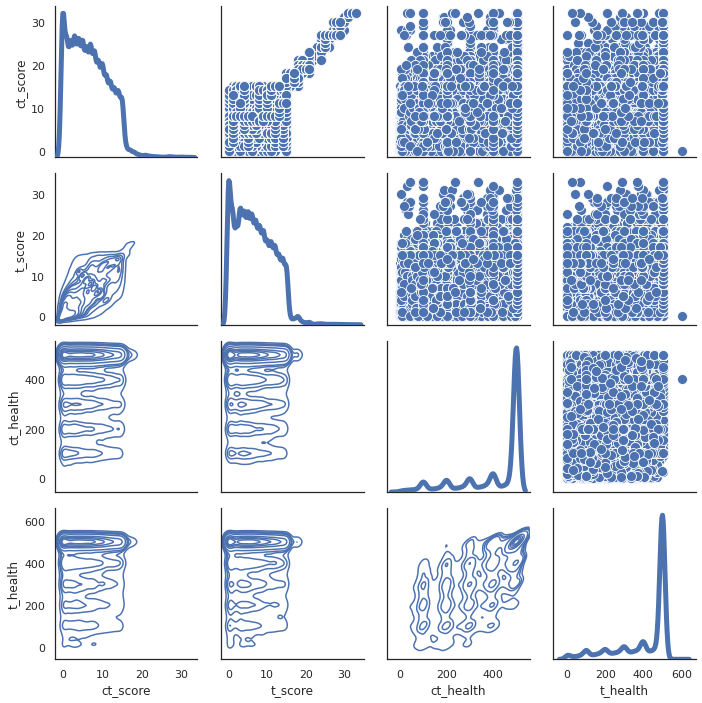

In [89]:
import seaborn as sns
sns.set_theme(style="white")



g = sns.PairGrid(base[['ct_score','t_score','ct_health','ct_health']], diag_sharey=False)
g.map_upper(sns.scatterplot, s=100)
g.map_lower(sns.kdeplot)
g.map_diag(sns.kdeplot, lw=5)

<Figure size 1440x360 with 0 Axes>

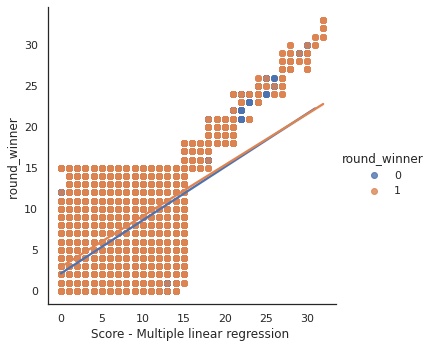

In [110]:
plt.figure(figsize=(20,5))

# Plot sepal width as a function of sepal_length across days
g = sns.lmplot(
    data=base,
    x="ct_score", y="t_score", hue="round_winner",
    height=5
)

# Use more informative axis labels than are provided by default
g.set_axis_labels("Score - Multiple linear regression ", "round_winner ")

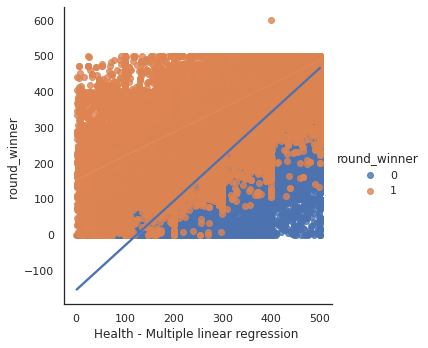

In [102]:

# Plot sepal width as a function of sepal_length across days
g = sns.lmplot(
    data=base,
    x="ct_health", y="t_health", hue="round_winner",
    height=5
)

# Use more informative axis labels than are provided by default
g.set_axis_labels("Health - Multiple linear regression ", "round_winner ")

<AxesSubplot:xlabel='ct_health', ylabel='Count'>

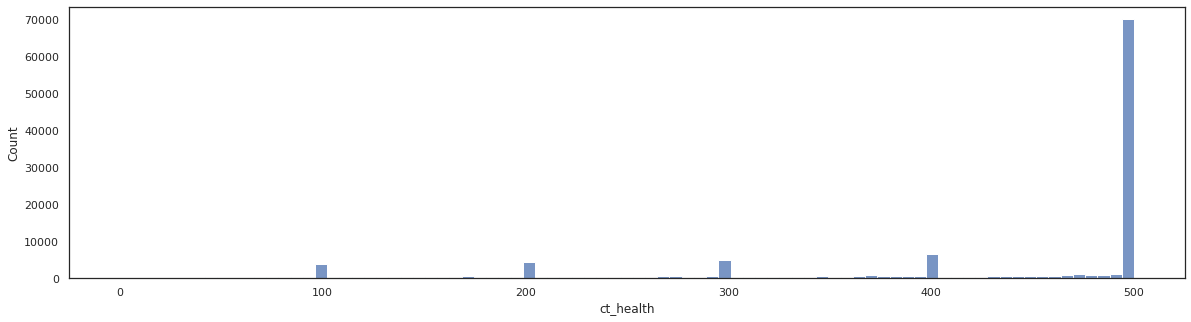

In [106]:

plt.figure(figsize=(20,5))

sns.histplot(base[base['t_health']<=0.2 * 1e8 ]['ct_health'])

## Padronização de CT e T 

In [98]:
base['round_winner'] = base['round_winner'].apply(lambda var: 0 if var == 'CT' else 1)

<AxesSubplot:xlabel='t_score', ylabel='Count'>

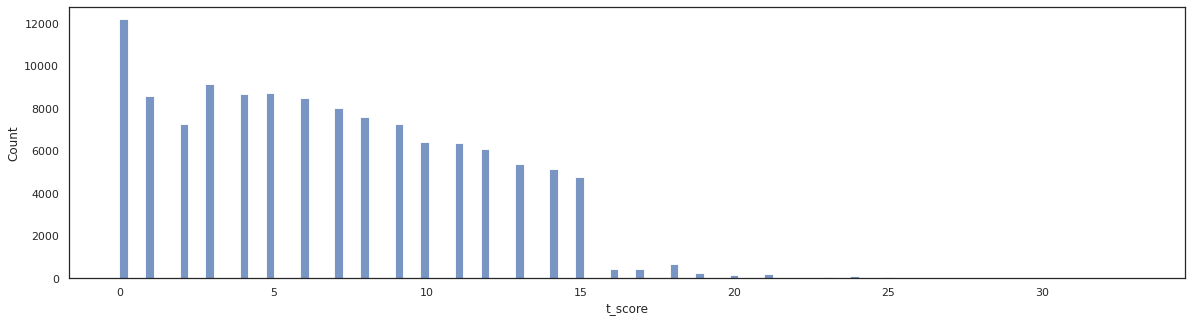

In [109]:

plt.figure(figsize=(20,5))

sns.histplot(base[base['t_score']<=0.2 * 1e8 ]['t_score'])

## Automação Exploração de Dadaos (EasyEAD)

In [122]:
!pip3 install sweetviz
!pip3 install ipywidgets

You should consider upgrading via the '/opt/conda/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/opt/conda/bin/python -m pip install --upgrade pip' command.


In [123]:
import sweetviz as sv

my_report = sv.analyze(base)
my_report.show_html()

ImportError: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html